In [56]:
# %%capture
# Install the latest Tensorflow version.
!pip install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn

You should consider upgrading via the '/home/barzamini/.pyenv/versions/3.7.6/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/barzamini/.pyenv/versions/3.7.6/bin/python3.7 -m pip install --upgrade pip' command.


You should consider upgrading via the '/home/barzamini/.pyenv/versions/3.7.6/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
from tqdm.notebook import tqdm, trange

In [2]:
tqdm.pandas()

In [3]:
import sys

In [4]:
import glob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [5]:
import os
import requests

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image

from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/barzamini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/barzamini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def find_gpus(nums=6):
    os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp_free_gpus')
    with open('tmp_free_gpus', 'r') as lines_txt:
        frees = lines_txt.readlines()
        idx_freeMemory_pair = [ (idx,int(x.split()[2]))
                              for idx,x in enumerate(frees) ]
    idx_freeMemory_pair.sort(key=lambda my_tuple:my_tuple[1],reverse=True)
    usingGPUs = [str(idx_memory_pair[0])
                    for idx_memory_pair in idx_freeMemory_pair[:nums] ]
    usingGPUs =  ','.join(usingGPUs)
    print('using GPU idx: #', usingGPUs)
    return usingGPUs

In [8]:
os.environ['CUDA_VISIBLE_DEVICES'] = find_gpus(nums=2)

using GPU idx: # 0,1


In [9]:
from random import randint

import numpy as np
# import torch

In [10]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [11]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [12]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
os.listdir('/raid/AISSEL/Hamed/datasets/wit/')

['wit_v1.train.all-00002-of-00010.tsv.gz',
 'wit_v1.train.all-00003-of-00010.tsv.gz',
 'wit_v1.train.all-00004-of-00010.tsv.gz',
 'wit_v1.train.all-00005-of-00010.tsv.gz',
 'wit_v1.train.all-00006-of-00010.tsv.gz',
 'wit_v1.train.all-00007-of-00010.tsv.gz',
 'wit_v1.train.all-00008-of-00010.tsv.gz',
 'wit_v1.train.all-00009-of-00010.tsv.gz',
 'wit_v1.train.all-1percent_sample.tsv',
 'wit_v1.train.all-00000-of-00010.tsv',
 'wit_v1.train.all-00000-of-00010_en_csim.tsv',
 'wit_v1.train.all-00001-of-00010.tsv']

In [15]:
root_path = '/raid/AISSEL/Hamed/datasets/wit'

In [ ]:
! gzip -d '/raid/AISSEL/Hamed/datasets/wit/wit_v1.train.all-1percent_sample.tsv.gz'

In [16]:
! gzip -d '/raid/AISSEL/Hamed/datasets/wit/wit_v1.train.all-00000-of-00010.tsv.gz'

In [18]:
df = pd.read_csv(f'{root_path}/wit_v1.train.all-00000-of-00010.tsv', sep='\t')
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,en,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,Oxydactylus,NaN,English: Mounted skeleton of Oxydactylus longi...,NaN,image/jpeg,3564,2748,True,True,False,Oxydactylus is an extinct genus of camelid end...,Oxydactylus is an extinct genus of camelid end...
1,cs,https://cs.wikipedia.org/wiki/Mechanick%C3%A1_...,http://upload.wikimedia.org/wikipedia/commons/...,Mechanická mířidla,NaN,Mechanická mířidla,Mechanická mířidla na útočné pušce M16,M16 rifle correct sight picture,NaN,image/png,606,1182,False,False,False,Mechanická mířidla je zařízení určené pro zamí...,Mechanická mířidla je zařízení určené pro zamí...
2,sq,https://sq.wikipedia.org/wiki/Mjedisi_natyror,https://upload.wikimedia.org/wikipedia/commons...,Mjedisi natyror,NaN,Mjedisi natyror,Menaxhimi i ujërave dhe tokës ka ruajtur karak...,"English: Hopetoun Falls, Beech Forest, near Ot...",NaN,image/jpeg,2048,3072,False,False,True,"Mjedis natyror quhet vendi, njerëzit, gjërat, ...","Mjedis natyror quhet vendi, njerëzit, gjërat, ..."
3,nl,https://nl.wikipedia.org/wiki/Zeesterren,http://upload.wikimedia.org/wikipedia/commons/...,Zeesterren,Armen,Zeesterren / Uiterlijke kenmerken / Armen,Voorzijde van een arm met buisvoetjes aan de o...,Français&#160;: Marthasteria glacialis (Linnae...,NaN,image/jpeg,2112,3200,False,True,False,Zeesterren zijn een groep van ongewervelde die...,De armen van de zeester moeten niet gezien wor...
4,de,https://de.wikipedia.org/wiki/Friedrich_von_%C...,https://upload.wikimedia.org/wikipedia/commons...,Friedrich von Österreich-Teschen,Erster Weltkrieg,Friedrich von Österreich-Teschen / Erster Welt...,Denkmal Erzherzog Friedrichs in Mosonmagyaróva...,"English: Monument to Frederic Habsburg, Mosonm...",NaN,image/jpeg,2043,1570,False,False,False,Erzherzog Friedrich Maria Albrecht Wilhelm Kar...,Friedrich sollte 1914 wegen seiner Disharmonie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708021,it,https://it.wikipedia.org/wiki/Tahiridi,https://upload.wikimedia.org/wikipedia/commons...,Tahiridi,NaN,Tahiridi,Mappa del Khorasan e delle altre province gove...,NaN,NaN,image/svg+xml,1200,1500,False,False,False,La dinastia Tahiride è stata la prima dinastia...,La dinastia Tahiride è stata la prima dinastia...
3708022,pl,https://pl.wikipedia.org/wiki/Menachem_Jedid,https://upload.wikimedia.org/wikipedia/commons...,Menachem Jedid,NaN,Menachem Jedid,NaN,English: Portrait of Knesset member Menachem Y...,Ilustracja,image/jpeg,3072,2048,True,False,False,Menachem Jedid – izraelski działacz społeczny ...,"Menachem Jedid (hebr.: מנחם ידיד, ang.: Menahe..."
3708023,sv,https://sv.wikipedia.org/wiki/Maignelay-Montigny,https://upload.wikimedia.org/wikipedia/commons...,Maignelay-Montigny,NaN,Maignelay-Montigny,NaN,"Maignelay-Montigny (Oise, France) - L'entrée d...",NaN,image/jpeg,2010,2739,True,False,False,Maignelay-Montigny är en kommun i departemente...,Maignelay-Montigny är en kommun i departemente...
3708024,de,https://de.wikipedia.org/wiki/Taubenhaus_Dobra...,https://upload.wikimedia.org/wikipedia/commons...,Taubenhaus Dobra (Bad Liebenwerda),NaN,Taubenhaus Dobra (Bad Liebenwerda),Taubenhaus Dobra,Deutsch: Taubenhaus Dobra (Bad Liebenwerda),NaN,image/jpeg,4608,3456,False,True,False,Das Taubenhaus befindet sich unweit der Dorfki...,Das Taubenhaus befindet sich unweit der Dorfki...


In [16]:
df = pd.read_csv(f'{root_path}/wit_v1.train.all-1percent_sample.tsv', sep='\t')
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,es,https://es.wikipedia.org/wiki/Hoz_y_martillo,https://upload.wikimedia.org/wikipedia/commons...,Hoz y martillo,Emblemas,Hoz y martillo / Galería / Emblemas,NaN,Galego: Logo do Movemento Galego ao Socialismo,NaN,image/jpeg,107,272,False,False,True,La hoz y el martillo es un símbolo que represe...,NaN
1,de,https://de.wikipedia.org/wiki/Kleines_Hasenmaul,https://upload.wikimedia.org/wikipedia/commons...,Kleines Hasenmaul,NaN,Kleines Hasenmaul,NaN,English: Lesser bulldog bat (Noctilio albivent...,NaN,image/jpeg,1636,2000,True,False,False,Das Kleine Hasenmaul ist eine Fledermausart au...,Das Kleine Hasenmaul (Noctilio albiventris) is...
2,ru,https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%...,https://upload.wikimedia.org/wikipedia/commons...,Украинская гривна,Изъятые из обращения монеты,Украинская гривна / Монеты / Изъятые из обраще...,NaN,English: Coin of Ukraine Русский: Юбилейная мо...,NaN,image/jpeg,193,200,False,True,True,"Гри́вна — национальная валюта Украины, названн...",С 1 июля 2018 года прекращён дополнительный вы...
3,ru,https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%...,http://upload.wikimedia.org/wikipedia/commons/...,Менделеево (Московская область),NaN,Менделеево (Московская область),NaN,English: mendeleevo,NaN,image/jpeg,1877,2756,True,True,False,Менделе́ево — посёлок городского типа Московск...,Менделе́ево — посёлок городского типа Московск...
4,sw,"https://sw.wikipedia.org/wiki/Brookline,_Massa...",https://upload.wikimedia.org/wikipedia/commons...,"Brookline, Massachusetts",NaN,"Brookline, Massachusetts","Sehemu za Mji wa Brookline, Massachusetts",English: Brookline MA August 2015 Photo Collage 2,NaN,image/jpeg,1936,1936,False,False,True,Brookline ni mji wa Marekani katika jimbo la M...,Brookline ni mji wa Marekani katika jimbo la M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370368,en,https://en.wikipedia.org/wiki/Suillus_quiescens,https://upload.wikimedia.org/wikipedia/commons...,Suillus quiescens,Habitat and distribution,Suillus quiescens / Habitat and distribution,S. quiescens forms mycorrhizal associations wi...,English: Pinus muricata at the Dundee Botanic ...,NaN,image/jpeg,2048,1536,False,True,False,Suillus quiescens is a pored mushroom of the g...,Fruit bodies grow together in small groups on ...
370369,fa,https://fa.wikipedia.org/wiki/%D8%A7%DA%A9%DB%...,https://upload.wikimedia.org/wikipedia/commons...,اکیر ترکی,NaN,اکیر ترکی,NaN,Species&#160; Acorus calamus Family&#160; Acor...,NaN,image/jpeg,1119,1650,True,False,False,اکیر ترکی نام یک سرده از گیاهان است.\nاین سرده...,اکیر ترکی (نام علمی: Acorus) نام یک سرده از گی...
370370,de,https://de.wikipedia.org/wiki/Fauler_See_(Schw...,http://upload.wikimedia.org/wikipedia/commons/...,Fauler See (Schwerin),NaN,Fauler See (Schwerin),NaN,"Lage der Seen in Schwerin, Position of the lak...",NaN,image/png,564,988,True,True,True,Der Faule See befindet sich in der mecklenburg...,Der Faule See befindet sich in der mecklenburg...
370371,ko,https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%...,https://upload.wikimedia.org/wikipedia/commons...,대한출판문화협회,NaN,대한출판문화협회,고영수 회장 (2015 서울국제도서전 개최 기념 기자간담회),한국어: 2015 서울국제도서전 개최 기념 기자간담회 (고영수 회장),NaN,image/jpeg,323,365,False,True,False,"대한출판문화협회는 출판산업의 건전한 발전도모, 출판문화의 사명달성으로 문화 향상에 ...","대한출판문화협회는 출판산업의 건전한 발전도모, 출판문화의 사명달성으로 문화 향상에 ..."


In [17]:
df = df[df["language"]=='en']

In [18]:
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,960,1280,False,False,True,Chinatown is an urban enclave situated in the ...,There are many bilingual street signs across C...
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,400,300,False,True,False,Jayson Scott Musson is an artist who lives and...,Jayson Scott Musson is an artist who lives and...
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,433,531,True,True,False,Euodynerus megaera is a species of stinging wa...,Euodynerus megaera is a species of stinging wa...
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,727,404,True,True,False,Simon Wolfe Rosendale was an American lawyer a...,"Simon Wolfe Rosendale (June 23, 1842 – April 2..."
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,1536,2048,False,True,False,The National Natural Landmarks in Florida incl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370348,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,NaN,National Register of Historic Places listings ...,NaN,English: This modern hardware store is located...,Patterson Brothers Commercial Building and House,image/jpeg,1467,2200,False,True,False,This is a list of Registered Historic Places i...,This is a list of Registered Historic Places i...
370356,en,https://en.wikipedia.org/wiki/Varahi,http://upload.wikimedia.org/wikipedia/commons/...,Varahi,Temples,Varahi / Worship / Temples,Central icon of Varahi Chaurasi temple,English: ~ VARAHI above her Buffalo Vahana ~ c...,NaN,image/jpeg,800,443,False,True,True,"Varahi is one of the Matrikas, a group of seve...",Apart from the temples in which Varahi is wors...
370357,en,https://en.wikipedia.org/wiki/Six-stroke_engine,http://upload.wikimedia.org/wikipedia/commons/...,Six-stroke engine,Griffin six-stroke engine,Six-stroke engine / Engine types / Single-pist...,The Kerr engine at the Anson Engine Museum,"The Anson Engine Museum in Poynton, Cheshire c...",NaN,image/jpeg,3264,2448,False,True,True,The term six-stroke engine has been applied to...,"In 1883, the Bath-based engineer Samuel Griffi..."
370358,en,https://en.wikipedia.org/wiki/Yi_Sun-sin,https://upload.wikimedia.org/wikipedia/commons...,Yi Sun-sin,Turtle Ships,Yi Sun-sin / Military career / Japanese invasi...,Drawing of a 16th-century turtle ship,16th century Korean turtle ship in a depiction...,NaN,image/jpeg,1046,1521,False,True,True,Admiral Yi Sunsin was a Korean admiral and mil...,One of Yi's greatest accomplishments was resur...


In [19]:
df.describe()

,original_height,original_width
count,54071.000000,54071.000000
mean,1535.394814,1836.366481
std,1199.416882,1520.742352
min,100.000000,100.000000
25%,578.000000,640.000000
50%,1181.000000,1312.000000
75%,2304.000000,2667.000000
max,13922.000000,25088.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54071 entries, 5 to 370368
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   language                         54071 non-null  object
 1   page_url                         54071 non-null  object
 2   image_url                        54071 non-null  object
 3   page_title                       54071 non-null  object
 4   section_title                    30871 non-null  object
 5   hierarchical_section_title       54071 non-null  object
 6   caption_reference_description    32550 non-null  object
 7   caption_attribution_description  50802 non-null  object
 8   caption_alt_text_description     5626 non-null   object
 9   mime_type                        54071 non-null  object
 10  original_height                  54071 non-null  int64 
 11  original_width                   54071 non-null  int64 
 12  is_main_image                  

### Semantic Analysis on caption_reference_description + caption_attribution_description

Also you can consider context_page_description and context_section_description columns for analysis 

In [21]:
df['caption']=df['caption_reference_description'].fillna('') + ' ' + df['caption_attribution_description'].fillna('')
df['context']=df['context_page_description'].fillna('') + '\n' + df['context_section_description'].fillna('')
# df['caption'] = df['caption'].apply(nospecial)
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description,caption,context
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,960,1280,False,False,True,Chinatown is an urban enclave situated in the ...,There are many bilingual street signs across C...,English: Hay Street 中文（繁體）‎: 禧街,Chinatown is an urban enclave situated in the ...
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,400,300,False,True,False,Jayson Scott Musson is an artist who lives and...,Jayson Scott Musson is an artist who lives and...,"Jayson Musson on October 29, 2007 English: Jay...",Jayson Scott Musson is an artist who lives and...
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,433,531,True,True,False,Euodynerus megaera is a species of stinging wa...,Euodynerus megaera is a species of stinging wa...,English: Euodynerus megaera,Euodynerus megaera is a species of stinging wa...
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,727,404,True,True,False,Simon Wolfe Rosendale was an American lawyer a...,"Simon Wolfe Rosendale (June 23, 1842 – April 2...","English: Simon Wolfe Rosendale (June 23, 1842...",Simon Wolfe Rosendale was an American lawyer a...
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,1536,2048,False,True,False,The National Natural Landmarks in Florida incl...,NaN,English: Photograph of Rainbow Springs in Mar...,The National Natural Landmarks in Florida incl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370348,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,NaN,National Register of Historic Places listings ...,NaN,English: This modern hardware store is located...,Patterson Brothers Commercial Building and House,image/jpeg,1467,2200,False,True,False,This is a list of Registered Historic Places i...,This is a list of Registered Historic Places i...,English: This modern hardware store is locate...,This is a list of Registered Historic Places i...
370356,en,https://en.wikipedia.org/wiki/Varahi,http://upload.wikimedia.org/wikipedia/commons/...,Varahi,Temples,Varahi / Worship / Temples,Central icon of Varahi Chaurasi temple,English: ~ VARAHI above her Buffalo Vahana ~ c...,NaN,image/jpeg,800,443,False,True,True,"Varahi is one of the Matrikas, a group of seve...",Apart from the temples in which Varahi is wors...,Central icon of Varahi Chaurasi temple English...,"Varahi is one of the Matrikas, a group of seve..."
370357,en,https://en.wikipedia.org/wiki/Six-stroke_engine,http://upload.wikimedia.org/wikipedia/commons/...,Six-stroke engine,Griffin six-stroke engine,Six-stroke engine / Engine types / Single-pist...,The Kerr engine at the Anson Engine Museum,"The Anson Engine Museum in Poynton, Cheshire c...",NaN,image/jpeg,3264,2448

### Universal Sentence Encoder Semantic Similarity By google

In [23]:
#@title Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344465866684914, 0.00048084152513183653, 0.06595247238874435, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.016524342820048332, 0.01573779061436653, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833269163966179, -0.0558621808886528, -0.012941472232341766, ...]



In [24]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

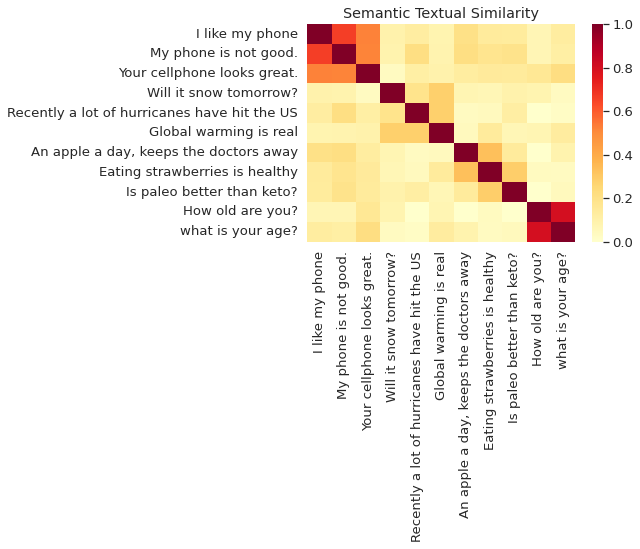

In [25]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [50]:
def get_similarity(labels, features):
    corr = np.inner(features[0], features[1])
#     print(f"Sent1: {labels[0]}\n Sent2: {labels[1]}\n Semantic Textual Similarity is: {corr}")
    return corr
    

def run_sim(u, v):
    messages_ = [u, v]
#     print(messages_)
    message_embeddings_ = embed(messages_)
    return get_similarity(messages_, message_embeddings_)

In [51]:
! date

Mon Apr 18 17:03:43 CDT 2022


In [52]:
df['caption'].progress_apply(run_sim, v='pedestrian stripe cross traffic crosswalk signal pedestrian')

  0%|          | 0/54071 [00:00<?, ?it/s]

5         0.092390
6         0.002651
8         0.071078
9        -0.032931
11        0.040371
            ...   
370348    0.027628
370356    0.084599
370357   -0.028147
370358   -0.050111
370368    0.040535
Name: caption, Length: 54071, dtype: float32

In [53]:
! date

Mon Apr 18 17:07:55 CDT 2022


In [36]:
def get_similarity_1(u, v):
    message_embeddings_ = embed([u])
    return np.inner(message_embeddings_, v)[0][0]


In [37]:
ms1 = "I like my phone"
ms2 = "My phone is not good."


In [38]:
em1 = embed([ms1])

In [39]:
em2 = embed([ms2])

In [40]:
np.inner(em1, em2)[0][0]

0.6610783

In [42]:
em2 = embed(["My phone is not good."])
sim1 = get_similarity_1("I like my phone", em2)
print(f"Similarity is: {sim1}")

Similarity is: 0.6610782742500305


In [32]:
sim = run_sim("I like my phone", "My phone is not good.")
print(f"Similarity is: {sim}")


Similarity is: 0.6610783338546753


In [43]:
l1 = embed(['pedestrian stripe cross traffic crosswalk signal pedestrian'])

In [44]:
! date

Mon Apr 18 16:59:02 CDT 2022


In [45]:
df['csim_196'] = df['caption'].progress_apply(get_similarity_1, v=l1)

  0%|          | 0/54071 [00:00<?, ?it/s]

In [46]:
! date

Mon Apr 18 17:02:07 CDT 2022


In [33]:
l1 = ['cross', 'crossing',
  'crosswalk',
  'pedestrian',
  'signal',
  'stripe',
  'traffic']
u = ' '.join(l1)
v = 'pedestrian cross street.'
sim = run_sim(u, v)
print(f"Sent1: {u}\nSent2: {v}\nSemantic Textual Similarity is: {sim}")

Sent1: cross crossing crosswalk pedestrian signal stripe traffic
Sent2: pedestrian cross street.
Semantic Textual Similarity is: 0.6211951971054077


### Load Bert Model For Pedestrian

In [34]:
from bertopic import BERTopic

In [35]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [36]:
ped_auto_model = BERTopic(nr_topics="auto")
ped_auto_model = BERTopic.load("ped_auto_model")

In [37]:
ped_similar_topics, ped_similarity = ped_auto_model.find_topics("pedestrian", top_n=50)
print(ped_similar_topics)

[196, 412, 172, 363, 198, 114, 419, 294, 388, 314, 98, 80, 134, 432, 394, 53, 56, 150, 278, -1, 43, 265, 345, 378, 11, 331, 202, 169, 327, 309, 68, 216, 40, 99, 426, 344, 47, 8, 416, 112, 137, 441, 192, 20, 296, 144, 12, 224, 250, 376]


In [38]:
ped_related_words = []
ped_topics = dict()
for t in ped_similar_topics:
#     print(t)
    l1 = ped_auto_model.get_topic(t)
#     print(l1)
    el_list = []
    for el in l1:
        w = lemmatizer.lemmatize(el[0], get_wordnet_pos(el[0]))
        el_list.append(w)
        ped_related_words.append(w)
#     for e in el_list:
#         print(e)
    ped_topics[t]= set(el_list)
#     print('\n')

In [41]:
! date

Fri Apr 15 21:14:10 CDT 2022


In [42]:
%%time
for top in ped_topics:
    l1 = ' '.join(ped_topics[top])
    print(top, l1)
    df[f'csim_{top}'] = df['caption'].progress_apply(run_sim, v=l1)

196 stripe cross traffic crosswalk crossing pedestrian signal


  0%|          | 0/542593 [00:00<?, ?it/s]

412 walk pers perp arrest walkability pedestrian walkable


  0%|          | 0/542593 [00:00<?, ?it/s]

172 vehicle street car road transportation lane traffic pedestrian


  0%|          | 0/542593 [00:00<?, ?it/s]

363 intervention stalker bystander victim witness stalk intervene assault


  0%|          | 0/542593 [00:00<?, ?it/s]

198 vehicle tow car parking parkjockey park garage


  0%|          | 0/542593 [00:00<?, ?it/s]

114 disability sport athlete sportspeople wheelchair paralympic paralympics


  0%|          | 0/542593 [00:00<?, ?it/s]

419 intersection boulevard avenue street manhattan road suffix


  0%|          | 0/542593 [00:00<?, ?it/s]

294 offence fine drive ticket penalty licence speed traffic reckless violation


  0%|          | 0/542593 [00:00<?, ?it/s]

388 markov walk wiener distribution diffusion stochastic percolation step brownian


  0%|          | 0/542593 [00:00<?, ?it/s]

314 intersection junction interchange roundabout circle lane road traffic


  0%|          | 0/542593 [00:00<?, ?it/s]

98 direction cross sign road parking traffic lane signage marker


  0%|          | 0/542593 [00:00<?, ?it/s]

80 accident drive vehicle velocity fatality nhtsa collision momentum brake


  0%|          | 0/542593 [00:00<?, ?it/s]

134 edmonton freeway avenue highway road gardiner expressway lane toronto ontario


  0%|          | 0/542593 [00:00<?, ?it/s]

432 book walker poem fiction poetry alice novel pulitzer


  0%|          | 0/542593 [00:00<?, ?it/s]

394 boulevard alley bridleway path bridleways footpath


  0%|          | 0/542593 [00:00<?, ?it/s]

53 concrete asphalt pavement cement pothole road gravel pave sand


  0%|          | 0/542593 [00:00<?, ?it/s]

56 trolley train tram bus transportation streetcar transit subway


  0%|          | 0/542593 [00:00<?, ?it/s]

150 intersection freeway highway ramp lane road traffic


  0%|          | 0/542593 [00:00<?, ?it/s]

278 walk promenaden promener deck promenade promenadef park


  0%|          | 0/542593 [00:00<?, ?it/s]

-1 public century water american street film her state example


  0%|          | 0/542593 [00:00<?, ?it/s]

43 protester white racial civil protest black race negro segregation


  0%|          | 0/542593 [00:00<?, ?it/s]

265 infant stroller harness diaper child carriage hatch baby


  0%|          | 0/542593 [00:00<?, ?it/s]

345 guardrail hazard barrier bumper protect rail safety


  0%|          | 0/542593 [00:00<?, ?it/s]

378 chicago park architect frederick city building architecture


  0%|          | 0/542593 [00:00<?, ?it/s]

11 intersection freeway terminus highway interstate route turnpike road lane


  0%|          | 0/542593 [00:00<?, ?it/s]

331 highway route byway road parkway roadway scenic navajo


  0%|          | 0/542593 [00:00<?, ?it/s]

202 vehicle delay downstream congestion congest road speed traffic bottleneck


  0%|          | 0/542593 [00:00<?, ?it/s]

169 shelter home housing homelessness apartment house condominium homeless household


  0%|          | 0/542593 [00:00<?, ?it/s]

327 torch pedestal bartholdi sculptor sculpture liberty statue monument lazarus


  0%|          | 0/542593 [00:00<?, ?it/s]

309 geelong train close adelaide line railway rail melbourne carriageworks


  0%|          | 0/542593 [00:00<?, ?it/s]

68 vehicle wheel axle chariot carriage wagon passenger


  0%|          | 0/542593 [00:00<?, ?it/s]

216 m11 motorway roundabout m32 m25 road lane m1 carriageway


  0%|          | 0/542593 [00:00<?, ?it/s]

40 police officer constabulary enforcement arrest patrol constable


  0%|          | 0/542593 [00:00<?, ?it/s]

99 concrete structure insulation roof masonry construction wall building


  0%|          | 0/542593 [00:00<?, ?it/s]

426 cv2x unlock vehicle v2x v2v vehicular vanets 80211p vanet


  0%|          | 0/542593 [00:00<?, ?it/s]

344 roman rome road corniche pave adriatic censor itinerary


  0%|          | 0/542593 [00:00<?, ?it/s]

47 brooklyn train broadwayseventh station broadway avenue manhattan subway bmt


  0%|          | 0/542593 [00:00<?, ?it/s]

8 cycling bicycle rid tire cycle rider cyclist bike


  0%|          | 0/542593 [00:00<?, ?it/s]

416 sift pixel detector ocr descriptor detection recognition vision keypoints


  0%|          | 0/542593 [00:00<?, ?it/s]

112 transport bus congestion route transportation freight traffic transit passenger


  0%|          | 0/542593 [00:00<?, ?it/s]

137 freeway motorway highway road lane expressway


  0%|          | 0/542593 [00:00<?, ?it/s]

441 shakespeare actor drama character hamlet romeo novel protagonist


  0%|          | 0/542593 [00:00<?, ?it/s]

192 symptom cerebral disorder syndrome cerebellum palsy gait cerebellar diplegia ataxia


  0%|          | 0/542593 [00:00<?, ?it/s]

20 dance foot leg dancer ankle toe


  0%|          | 0/542593 [00:00<?, ?it/s]

296 playground park yellowstone area monument wilderness scenic recreation


  0%|          | 0/542593 [00:00<?, ?it/s]

144  more image comma person share address video separate


  0%|          | 0/542593 [00:00<?, ?it/s]

12 hike trail appalachian mountain path hiker footpath


  0%|          | 0/542593 [00:00<?, ?it/s]

224 tram bus depot singapore sb fleet transit goahead smrt


  0%|          | 0/542593 [00:00<?, ?it/s]

250 kmdf umdf kernelmode usb kernel graphic driver linux printer


  0%|          | 0/542593 [00:00<?, ?it/s]

376 trolley cartoon peanut snoopy charlie lucy disney bear mickey


  0%|          | 0/542593 [00:00<?, ?it/s]

CPU times: user 2d 21h 19min 29s, sys: 10h 26min 10s, total: 3d 7h 45min 39s
Wall time: 1d 9h 18min 9s


In [ ]:
! date

In [45]:
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,...,csim_137,csim_441,csim_192,csim_20,csim_296,csim_144,csim_12,csim_224,csim_250,csim_376
0,en,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,Oxydactylus,NaN,English: Mounted skeleton of Oxydactylus longi...,NaN,image/jpeg,...,0.022390,0.017340,0.068468,0.105572,0.309375,-0.064047,0.126270,0.054185,0.061353,0.007972
5,en,https://en.wikipedia.org/wiki/Maine%27s_3rd_co...,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,List of members representing the district,Maine's 3rd congressional district / List of m...,NaN,"English: Samuel W. Gould, US Representative fr...",NaN,image/jpeg,...,0.091500,0.171062,0.131640,-0.054578,0.030377,-0.049593,0.007117,0.040431,0.019668,0.098337
7,en,https://en.wikipedia.org/wiki/Cheraw,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,18th century,Cheraw / History / 18th century,A c. 1724 English copy of a deerskin Catawba m...,"English: ""Map of the Several Nations of Indian...",NaN,image/jpeg,...,0.028648,0.124176,0.103128,-0.115666,0.098822,0.038694,0.061790,-0.038401,0.093548,0.002280
13,en,https://en.wikipedia.org/wiki/Romanian_Front,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,Stagnation,Romanian Front / History / Stagnation,"Nameplate of Gazeta Transilvaniei on June 14, ...",English: Nameplate of the Romanian nationalist...,NaN,image/png,...,0.000092,0.010703,0.119094,-0.088100,0.010767,-0.052269,-0.114121,0.209922,0.122310,-0.007919
18,en,https://en.wikipedia.org/wiki/%C3%81d%C3%A1m_K...,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,NaN,Ádám Kósa,NaN,English: Hungarian MEP Ádám Kósa,NaN,image/jpeg,...,0.065469,0.231577,0.151084,0.121727,0.105916,-0.041195,0.099385,0.124610,0.005871,0.110721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707993,en,https://en.wikipedia.org/wiki/History_of_Latin,https://upload.wikimedia.org/wikipedia/commons...,History of Latin,Old Latin,History of Latin / Old Latin,"The Duenos inscription, from the 6th century B...",NaN,NaN,image/jpeg,...,0.010794,0.040765,0.007090,-0.067847,-0.059921,-0.066225,0.016226,0.011186,0.002621,0.002518
3707995,en,https://en.wikipedia.org/wiki/Battenberg_Castle,http://upload.wikimedia.org/wikipedia/commons/...,Battenberg Castle,NaN,Battenberg Castle,The Blitzröhren below the castle ruins,English: The so-called lightning tubes near Ba...,NaN,image/jpeg,...,-0.025319,0.093329,-0.026042,0.062904,0.052405,-0.087140,-0.060968,0.106147,0.028181,0.017901
3708002,en,https://en.wikipedia.org/wiki/List_of_research...,https://upload.wikimedia.org/wikipedia/commons...,List of research vessels by country,National Oceanic and Atmospheric Administration,List of research vessels by country / United S...,"NOAAS Rainier with her namesake, Mount Rainier...",English: NOAAS Rainier (S 221) with Mount Rain...,NaN,image/jpeg,...,0.065336,-0.157723,0.163076,0.040576,0.111547,0.121374,0.290479,0.000649,0.064537,-0.015699
3708005,en,https://en.wikipedia.org/wiki/Kino_Works,https://upload.wikimedia.org/wikipedia/commons...,Kino Works,NaN,Kino Works,NaN,English: Kino Works LLP Official Logo,NaN,image/jpeg,...,0.056818,0.018591,-0.002724,0.026999,-0.006449,0.171142,-0.081250,0.093797,0.097209,0.022187


In [66]:
! date

Fri Apr 15 02:28:08 CDT 2022


In [49]:
# print(df.columns)
csim = [el for el in df.columns if 'csim' in el]
b_col = [el for el in df.columns if 'csim' not in el]
print(len(csim))

50


In [52]:
print(len(b_col))
b_col.remove('caption')
b_col.remove('context')
print(len(b_col))

19
17


In [58]:
df[b_col + csim]

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,...,csim_137,csim_441,csim_192,csim_20,csim_296,csim_144,csim_12,csim_224,csim_250,csim_376
0,en,https://en.wikipedia.org/wiki/Oxydactylus,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,Oxydactylus,NaN,English: Mounted skeleton of Oxydactylus longi...,NaN,image/jpeg,...,0.022390,0.017340,0.068468,0.105572,0.309375,-0.064047,0.126270,0.054185,0.061353,0.007972
5,en,https://en.wikipedia.org/wiki/Maine%27s_3rd_co...,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,List of members representing the district,Maine's 3rd congressional district / List of m...,NaN,"English: Samuel W. Gould, US Representative fr...",NaN,image/jpeg,...,0.091500,0.171062,0.131640,-0.054578,0.030377,-0.049593,0.007117,0.040431,0.019668,0.098337
7,en,https://en.wikipedia.org/wiki/Cheraw,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,18th century,Cheraw / History / 18th century,A c. 1724 English copy of a deerskin Catawba m...,"English: ""Map of the Several Nations of Indian...",NaN,image/jpeg,...,0.028648,0.124176,0.103128,-0.115666,0.098822,0.038694,0.061790,-0.038401,0.093548,0.002280
13,en,https://en.wikipedia.org/wiki/Romanian_Front,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,Stagnation,Romanian Front / History / Stagnation,"Nameplate of Gazeta Transilvaniei on June 14, ...",English: Nameplate of the Romanian nationalist...,NaN,image/png,...,0.000092,0.010703,0.119094,-0.088100,0.010767,-0.052269,-0.114121,0.209922,0.122310,-0.007919
18,en,https://en.wikipedia.org/wiki/%C3%81d%C3%A1m_K...,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,NaN,Ádám Kósa,NaN,English: Hungarian MEP Ádám Kósa,NaN,image/jpeg,...,0.065469,0.231577,0.151084,0.121727,0.105916,-0.041195,0.099385,0.124610,0.005871,0.110721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707993,en,https://en.wikipedia.org/wiki/History_of_Latin,https://upload.wikimedia.org/wikipedia/commons...,History of Latin,Old Latin,History of Latin / Old Latin,"The Duenos inscription, from the 6th century B...",NaN,NaN,image/jpeg,...,0.010794,0.040765,0.007090,-0.067847,-0.059921,-0.066225,0.016226,0.011186,0.002621,0.002518
3707995,en,https://en.wikipedia.org/wiki/Battenberg_Castle,http://upload.wikimedia.org/wikipedia/commons/...,Battenberg Castle,NaN,Battenberg Castle,The Blitzröhren below the castle ruins,English: The so-called lightning tubes near Ba...,NaN,image/jpeg,...,-0.025319,0.093329,-0.026042,0.062904,0.052405,-0.087140,-0.060968,0.106147,0.028181,0.017901
3708002,en,https://en.wikipedia.org/wiki/List_of_research...,https://upload.wikimedia.org/wikipedia/commons...,List of research vessels by country,National Oceanic and Atmospheric Administration,List of research vessels by country / United S...,"NOAAS Rainier with her namesake, Mount Rainier...",English: NOAAS Rainier (S 221) with Mount Rain...,NaN,image/jpeg,...,0.065336,-0.157723,0.163076,0.040576,0.111547,0.121374,0.290479,0.000649,0.064537,-0.015699
3708005,en,https://en.wikipedia.org/wiki/Kino_Works,https://upload.wikimedia.org/wikipedia/commons...,Kino Works,NaN,Kino Works,NaN,English: Kino Works LLP Official Logo,NaN,image/jpeg,...,0.056818,0.018591,-0.002724,0.026999,-0.006449,0.171142,-0.081250,0.093797,0.097209,0.022187


In [60]:
df[b_col + csim].to_csv(f'{root_path}/wit_v1.train.all-00000-of-00010_en_csim.tsv', sep="\t")

In [71]:
l1 = ' '.join(ped_related_words_by_topic[196])
l1

'traffic stripe crosswalk cross pedestrian crossing signal'

In [72]:
df['caption'].progress_apply(run_sim, v=l1)

  0%|          | 0/54071 [00:00<?, ?it/s]

5         0.116637
6         0.002058
8         0.036071
9        -0.022394
11        0.092983
            ...   
370348    0.010374
370356    0.093084
370357   -0.028913
370358   -0.028137
370368    0.044710
Name: caption, Length: 54071, dtype: float32

In [61]:
! gzip -d '/raid/AISSEL/Hamed/datasets/wit/wit_v1.train.all-00001-of-00010.tsv.gz'
df_1 = pd.read_csv(f'{root_path}/wit_v1.train.all-00001-of-00010.tsv', sep='\t')
df_1

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,fy,https://fy.wikipedia.org/wiki/Us_Heit_(bier),https://upload.wikimedia.org/wikipedia/commons...,Us Heit (bier),NaN,Us Heit (bier),Us Heit dûbeld weetbier,English: Us Heit Dubbel Tarwe Bier. Nederlands...,NaN,image/jpeg,2412,1728,False,True,False,Us Heit is in biermerk dat broud wurdt troch d...,Us Heit is in biermerk dat broud wurdt troch d...
1,ja,https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%...,https://upload.wikimedia.org/wikipedia/commons...,ネコ目,NaN,ネコ目,オオヤマネコ Lynx lynx,Bilde av gaupen på Langedrag Naturpark (the Eu...,NaN,image/jpeg,1568,2048,True,False,False,ネコ目は脊椎動物亜門 哺乳綱に属する動物の分類群。学名の Carnivora を直訳して食肉...,ネコ目（ネコもく）は脊椎動物亜門 哺乳綱に属する動物の分類群。学名の Carnivora を...
2,en,https://en.wikipedia.org/wiki/Joie_de_Vivre,https://upload.wikimedia.org/wikipedia/commons...,Joie de Vivre,NaN,Joie de Vivre,The sculpture in 2008,en:Mark di Suvero's en:Joie de Vivre sculpture...,NaN,image/jpeg,1396,2003,True,True,True,Joie de Vivre is an outdoor sculpture by Mark ...,Joie de Vivre (English: Joy of Life) is an out...
3,nn,https://nn.wikipedia.org/wiki/Orbital,http://upload.wikimedia.org/wikipedia/commons/...,Orbital,NaN,Orbital,Elektronets orbitalar i atom og molekyl,NaN,NaN,image/svg+xml,556,857,False,False,False,"Innan kjemi og partikkelfysikk, er orbital nem...","Innan kjemi og partikkelfysikk, er orbital nem..."
4,ja,https://ja.wikipedia.org/wiki/%E5%B1%B1%E5%B4%...,http://upload.wikimedia.org/wikipedia/commons/...,山崎浩司,オリックス時代,山崎浩司 / 経歴 / オリックス時代,オリックス時代\n（2012年7月8日、QVCマリンフィールド）,"English: Koji Yamasaki, infielder of the Orix ...",NaN,image/jpeg,2258,1500,False,True,False,山﨑 浩司は、大阪府大阪市淀川区出身の元プロ野球選手。\n広島東洋カープ時代にセントラル・リ...,2008年7月18日に、田中彰との交換トレードで、オリックス・バファローズへ移籍。形式上は古...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702070,jv,https://jv.wikipedia.org/wiki/Sastra_Inggris_Kuna,https://upload.wikimedia.org/wikipedia/commons...,Sastra Inggris Kuna,NaN,Sastra Inggris Kuna,"Kaca utama Kronik Peterborough, mbokmenawa dit...",The initial page of the Peterborough Chronicle...,NaN,image/jpeg,1370,896,False,False,False,Sastra Anglo-Saxon utawa sastra Inggris Kuna i...,Sastra Anglo-Saxon utawa sastra Inggris Kuna i...
3702071,it,https://it.wikipedia.org/wiki/Andrea_Gardini,https://upload.wikimedia.org/wikipedia/it/3/31...,Andrea Gardini,Carriera,Andrea Gardini / Carriera,"Gardini a Ravenna nel 1991 (a sinistra), a mur...","Mestre (Venezia), Palasport Taliercio, 4 april...",NaN,image/jpeg,1842,1581,False,True,True,Andrea Gardini è un allenatore di pallavolo ed...,È stato uno dei giocatori più vincenti della s...
3702072,zh,https://zh.wikipedia.org/wiki/%E6%96%B0%E7%BD%...,https://upload.wikimedia.org/wikipedia/commons...,新罕布什爾省,NaN,新罕布什爾省,显示新罕布什尔省领土声称的地图,This is a map of the Province of New Hampshire...,NaN,image/png,500,480,False,False,False,新罕布什尔省是英国在北美洲的殖民地，后来成为英国省份。名称首次使用是在1629年，介乎北美洲...,新罕布什尔省（英语：Province of New Hampshire）是英国在北美洲的殖民...
3702073,zh-TW,https://zh.wikipedia.org/zh-tw/%E7%91%9E%E5%B9...,https://upload.wikimedia.org/wikipedia/commons...,瑞幸咖啡,經營,瑞幸咖啡 / 經營,瑞幸咖啡「小藍杯」,English: A cup of Luckin Coffee,NaN,image/jpeg,1583,1080,False,False,True,瑞幸咖啡是中國大陸的新零售專業咖啡營運商，由前神州優車集團營運長錢治亞創立，公司在開曼群島註...,瑞幸咖啡在2018年1月才開始試營運，靠著大量補貼與便利的APP外送商業模式，搭配病毒式的媒...


In [62]:
def calculate_sim(df, run_sim, ped_topics):
    df['caption']=df['caption_reference_description'].fillna('') + ' ' + df['caption_attribution_description'].fillna('')
    for top in ped_topics:
        l1 = ' '.join(ped_topics[top])
        print(top, l1)
        df[f'csim_{top}'] = df['caption'].progress_apply(run_sim, v=l1)
    csim = [el for el in df.columns if 'csim' in el]
    b_col = [el for el in df.columns if 'csim' not in el]
    b_col.remove('caption')
    return df[b_col + csim]

In [63]:
df_1 = df_1[df_1["language"]=='en']
df_1

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
2,en,https://en.wikipedia.org/wiki/Joie_de_Vivre,https://upload.wikimedia.org/wikipedia/commons...,Joie de Vivre,NaN,Joie de Vivre,The sculpture in 2008,en:Mark di Suvero's en:Joie de Vivre sculpture...,NaN,image/jpeg,1396,2003,True,True,True,Joie de Vivre is an outdoor sculpture by Mark ...,Joie de Vivre (English: Joy of Life) is an out...
11,en,https://en.wikipedia.org/wiki/M%C3%A1riusz_R%C...,https://upload.wikimedia.org/wikipedia/commons...,Máriusz Révész,NaN,Máriusz Révész,NaN,English: Révész Máriusz (2016),NaN,image/jpeg,3072,2304,True,False,True,Máriusz Révész is a Hungarian politician of th...,"Máriusz Révész (born 31 May 1967, in Budapest)..."
28,en,https://en.wikipedia.org/wiki/West_Virginia_Di...,https://upload.wikimedia.org/wikipedia/commons...,West Virginia Division of Corrections and Reha...,NaN,West Virginia Division of Corrections and Reha...,NaN,"English: Image is similar, if not identical, t...",NaN,image/png,696,600,False,True,False,The West Virginia Division of Corrections and ...,The West Virginia Division of Corrections and ...
39,en,https://en.wikipedia.org/wiki/Eggenberg_Palace...,https://upload.wikimedia.org/wikipedia/commons...,"Eggenberg Palace, Graz",Construction,"Eggenberg Palace, Graz / History / Construction",Eggenberg Palace (2019),English: Eggenberg Palace,"Schloss Eggenberg, Graz, Austria",image/jpeg,3864,5152,False,True,True,"Eggenberg Palace in Graz, is the most signific...","At first glance, Schloss Eggenberg presents it..."
42,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,Current listings,National Register of Historic Places listings ...,NaN,English: pueblo grande ruins This is an image ...,Hohokam-Pima Irrigation Sites,image/jpeg,1452,1981,False,True,True,This is a list of the National Register of His...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702042,en,https://en.wikipedia.org/wiki/USS_Pee_Dee_River,http://upload.wikimedia.org/wikipedia/commons/...,USS Pee Dee River,NaN,USS Pee Dee River,LSM(R)-517 in 1954,NaN,USS Pee Dee River LSMR-517,image/jpeg,616,769,True,False,False,"USS Pee Dee River, an LSM-501-class landing sh...","USS Pee Dee River (LSM(R)-517), an LSM(R)-501-..."
3702043,en,https://en.wikipedia.org/wiki/Antelope_Wells_P...,https://upload.wikimedia.org/wikipedia/commons...,Antelope Wells Port of Entry,NaN,Antelope Wells Port of Entry,"Antelope Wells Port of Entry, December, 2001","English: Antelope Wells Port of Entry, Decembe...",NaN,image/jpeg,1200,1600,True,True,False,The Antelope Wells Port of Entry is an interna...,The Antelope Wells Port of Entry is an interna...
3702058,en,https://en.wikipedia.org/wiki/Processed_cheese,https://upload.wikimedia.org/wikipedia/commons...,Processed cheese,United States,Processed cheese / Legal definitions / United ...,A gift pack containing several varieties of la...,Example of a w:Hickory Farms product assortment,NaN,image/jpeg,1382,2576,False,True,True,Processed cheese is a food product made from c...,"In the United States, processed cheese is defi..."
3702066,en,https://en.wikipedia.org/wiki/List_of_church_r...,https://upload.wikimedia.org/wikipedia/commons...,List of church restorations and alterations by...,Works,List of church restorations and alterations by...,NaN,"English: St. Peter's Church, Edgmond, Shropshire.",NaN,image/jpeg,479,640,False,True,False,G. E. Street was an English architect and arch...,NaN


In [ ]:
df_1_csim = calculate_sim(df_1, run_sim, ped_topics)

196 stripe cross traffic crosswalk crossing pedestrian signal


  0%|          | 0/542006 [00:00<?, ?it/s]

412 walk pers perp arrest walkability pedestrian walkable


  0%|          | 0/542006 [00:00<?, ?it/s]

172 vehicle street car road transportation lane traffic pedestrian


  0%|          | 0/542006 [00:00<?, ?it/s]

363 intervention stalker bystander victim witness stalk intervene assault


  0%|          | 0/542006 [00:00<?, ?it/s]

198 vehicle tow car parking parkjockey park garage


  0%|          | 0/542006 [00:00<?, ?it/s]

114 disability sport athlete sportspeople wheelchair paralympic paralympics


  0%|          | 0/542006 [00:00<?, ?it/s]

419 intersection boulevard avenue street manhattan road suffix


  0%|          | 0/542006 [00:00<?, ?it/s]

294 offence fine drive ticket penalty licence speed traffic reckless violation


  0%|          | 0/542006 [00:00<?, ?it/s]

388 markov walk wiener distribution diffusion stochastic percolation step brownian


  0%|          | 0/542006 [00:00<?, ?it/s]

314 intersection junction interchange roundabout circle lane road traffic


  0%|          | 0/542006 [00:00<?, ?it/s]

98 direction cross sign road parking traffic lane signage marker


  0%|          | 0/542006 [00:00<?, ?it/s]

80 accident drive vehicle velocity fatality nhtsa collision momentum brake


  0%|          | 0/542006 [00:00<?, ?it/s]

134 edmonton freeway avenue highway road gardiner expressway lane toronto ontario


  0%|          | 0/542006 [00:00<?, ?it/s]

432 book walker poem fiction poetry alice novel pulitzer


  0%|          | 0/542006 [00:00<?, ?it/s]

394 boulevard alley bridleway path bridleways footpath


  0%|          | 0/542006 [00:00<?, ?it/s]

53 concrete asphalt pavement cement pothole road gravel pave sand


  0%|          | 0/542006 [00:00<?, ?it/s]

56 trolley train tram bus transportation streetcar transit subway


  0%|          | 0/542006 [00:00<?, ?it/s]

150 intersection freeway highway ramp lane road traffic


  0%|          | 0/542006 [00:00<?, ?it/s]

278 walk promenaden promener deck promenade promenadef park


  0%|          | 0/542006 [00:00<?, ?it/s]

-1 public century water american street film her state example


  0%|          | 0/542006 [00:00<?, ?it/s]

43 protester white racial civil protest black race negro segregation


  0%|          | 0/542006 [00:00<?, ?it/s]

265 infant stroller harness diaper child carriage hatch baby


  0%|          | 0/542006 [00:00<?, ?it/s]

345 guardrail hazard barrier bumper protect rail safety


  0%|          | 0/542006 [00:00<?, ?it/s]

378 chicago park architect frederick city building architecture


  0%|          | 0/542006 [00:00<?, ?it/s]

11 intersection freeway terminus highway interstate route turnpike road lane


  0%|          | 0/542006 [00:00<?, ?it/s]

331 highway route byway road parkway roadway scenic navajo


  0%|          | 0/542006 [00:00<?, ?it/s]

202 vehicle delay downstream congestion congest road speed traffic bottleneck


  0%|          | 0/542006 [00:00<?, ?it/s]

169 shelter home housing homelessness apartment house condominium homeless household


  0%|          | 0/542006 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

327 torch pedestal bartholdi sculptor sculpture liberty statue monument lazarus


  0%|          | 0/542006 [00:00<?, ?it/s]

309 geelong train close adelaide line railway rail melbourne carriageworks


  0%|          | 0/542006 [00:00<?, ?it/s]

68 vehicle wheel axle chariot carriage wagon passenger


  0%|          | 0/542006 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [ ]:
! ls

In [ ]:
! date

### concurrent

In [37]:
import concurrent.futures
import urllib.request

In [37]:
l1 = "I like my phone"

In [38]:
df['caption'].progress_apply(add_test, b=l1)

  0%|          | 0/54071 [00:00<?, ?it/s]

5            English: Hay Street 中文（繁體）‎: 禧街I like my phone
6         Jayson Musson on October 29, 2007 English: Jay...
8                English: Euodynerus megaeraI like my phone
9          English: Simon Wolfe Rosendale (June 23, 1842...
11         English: Photograph of Rainbow Springs in Mar...
                                ...                        
370348     English: This modern hardware store is locate...
370356    Central icon of Varahi Chaurasi temple English...
370357    The Kerr engine at the Anson Engine Museum The...
370358    Drawing of a 16th-century turtle ship 16th cen...
370368    S. quiescens forms mycorrhizal associations wi...
Name: caption, Length: 54071, dtype: object

In [107]:
for top in ped_topics:
    l1 = ' '.join(ped_topics[top])
    print(top, l1)

In [39]:
! date

Fri Apr 15 14:19:52 CDT 2022


In [40]:
%%timeit
def extend_df(topic):
    l1 = ' '.join(ped_topics[topic])
#      return topic, df['caption'].progress_apply(add_test, b=l1)
    return topic, df['caption'].apply(run_sim, v=l1)

with concurrent.futures.ThreadPoolExecutor(max_workers = 32) as executor:
    future_to_url = {executor.submit(extend_df, topic): topic for topic in ped_topics}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
#             print(f'data is: {data}')
            df[f'csim_{data[0]}'] = data[1]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [41]:
! date

Fri Apr 15 17:59:51 CDT 2022


In [42]:
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,...,csim_112,csim_441,csim_296,csim_137,csim_192,csim_144,csim_12,csim_224,csim_376,csim_250
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,...,0.161371,0.195378,0.026163,0.242804,0.100138,0.159939,0.114825,0.092189,0.049152,0.000707
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,...,0.039502,0.099427,0.014676,0.029506,0.070422,0.005971,0.074741,-0.048804,0.080995,0.058849
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,...,-0.001021,0.228361,0.048696,0.085315,0.011682,0.014514,0.017038,0.056326,0.072097,-0.074919
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,...,-0.090047,0.187481,0.014972,0.072903,0.095909,-0.034294,-0.033107,0.002574,0.047617,-0.055188
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,...,-0.003004,0.081639,0.025220,0.023916,0.054032,-0.045488,0.069793,0.064158,0.137453,0.027588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370348,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,NaN,National Register of Historic Places listings ...,NaN,English: This modern hardware store is located...,Patterson Brothers Commercial Building and House,image/jpeg,...,-0.017841,0.072777,0.070543,0.056938,0.045343,0.139604,0.047107,-0.021570,0.023648,-0.121596
370356,en,https://en.wikipedia.org/wiki/Varahi,http://upload.wikimedia.org/wikipedia/commons/...,Varahi,Temples,Varahi / Worship / Temples,Central icon of Varahi Chaurasi temple,English: ~ VARAHI above her Buffalo Vahana ~ c...,NaN,image/jpeg,...,-0.071147,-0.002449,0.106837,0.117681,0.105361,0.133187,0.159936,0.055258,-0.032383,0.083995
370357,en,https://en.wikipedia.org/wiki/Six-stroke_engine,http://upload.wikimedia.org/wikipedia/commons/...,Six-stroke engine,Griffin six-stroke engine,Six-stroke engine / Engine types / Single-pist...,The Kerr engine at the Anson Engine Museum,"The Anson Engine Museum in Poynton, Cheshire c...",NaN,image/jpeg,...,0.008821,0.057514,0.027042,0.029014,0.227183,-0.073469,-0.033895,0.110050,0.051882,-0.016992
370358,en,https://en.wikipedia.org/wiki/Yi_Sun-sin,https://upload.wikimedia.org/wikipedia/commons...,Yi Sun-sin,Turtle Ships,Yi Sun-sin / Military career / Japanese invasi...,Drawing of a 16th-century turtle ship,16th century Korean turtle ship in a depiction...,NaN,image/jpeg,...,-0.061475,0.140242,-0.113468,-0.018239,0.068309,-0.109836,-0.111219,0.035423,0.065333,-0.001464


### Parallelize

In [70]:
import dask.dataframe as dd
import multiprocessing

In [73]:
l1

'crosswalk traffic signal crossing pedestrian stripe cross'

In [76]:
%%time
df['caption'].progress_apply(run_sim, v=l1)

  0%|          | 0/54071 [00:00<?, ?it/s]

CPU times: user 8min 48s, sys: 1min 12s, total: 10min 1s
Wall time: 4min 8s


5         0.092002
6        -0.008897
8         0.032084
9        -0.042296
11        0.068807
            ...   
370348    0.017291
370356    0.117951
370357   -0.038741
370358   -0.039372
370368    0.054498
Name: caption, Length: 54071, dtype: float32

In [83]:
# ddf = dd.from_pandas(df, npartitions=4 * multiprocessing.cpu_count())
ddf = dd.from_pandas(df, npartitions=4 * multiprocessing.cpu_count())

In [89]:
! date

Fri Apr 15 19:18:54 CDT 2022


In [90]:
%%timeit
ddf ['z'] = ddf.map_partitions(lambda df1: df1.apply((lambda row:get_similarity1(row.caption, l1)), axis=1)).compute()

KeyboardInterrupt: 

In [91]:
! date

Fri Apr 15 19:28:44 CDT 2022


In [87]:
%%time
df['caption'].swifter.apply(run_sim, v=l1)

Pandas Apply:   0%|          | 0/54071 [00:00<?, ?it/s]

CPU times: user 9min 23s, sys: 1min 17s, total: 10min 41s
Wall time: 4min 22s


5         0.092002
6        -0.008897
8         0.032084
9        -0.042296
11        0.068807
            ...   
370348    0.017291
370356    0.117951
370357   -0.038741
370358   -0.039372
370368    0.054498
Name: caption, Length: 54071, dtype: float32

In [88]:
! date

Fri Apr 15 19:17:03 CDT 2022


### Parallelize Pandas map()

In [94]:
from multiprocessing import cpu_count, Pool
from functools import partial
partitions = cpu_count() #Define as many partitions as you want

In [95]:
def add_features(daf, i_tuple):
    topic = i_tuple[0]
    l1 = i_tuple[1]
    daf[f'csim_{top}'] = daf['caption'].apply(run_sim, v=l1)
    return daf

In [96]:
def parallelize_dataframe(df, func, topic_s="test", topic_n=0, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(partial(func, (topic_n, topic_s)), df_split))
    pool.close()
    pool.join()
    return df

In [102]:
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [103]:
def add_features(daf):
    l1 = 'crosswalk traffic signal crossing pedestrian stripe cross'
    daf[f'196'] = daf['caption'].apply(run_sim, v=l1)
    return daf

In [97]:
l1

'crosswalk traffic signal crossing pedestrian stripe cross'

In [104]:
! date

Fri Apr 15 19:51:48 CDT 2022


In [105]:
%%time
train = parallelize_dataframe(df, add_features, n_cores=32)

In [111]:
! date

In [110]:
train